# Random Forest

In [43]:
import pandas as pd 
from matplotlib import pyplot as plt  
import seaborn as sns 

In [44]:
sns.set_style('whitegrid')
plt.style.use('seaborn-dark-palette')

In [45]:
data = pd.read_csv('result/res_data_all.csv').reset_index(drop=True)
display(data.head(2))
feat =  pd.read_csv('result/feat_imp.csv').reset_index(drop=True)
feat

,index,src_id,src_n,true_class,pred_class,pred_prob,th_class,is_ok,truth,clf_type,...,hard_hm_hilim,flux_aper_lolim_m,flux_aper_lolim,hard_hm,hard_ms,bb_nh,powlaw_ampl_hilim,powlaw_ampl,powlaw_gamma_hilim,flux_aper_lolim_b
0,0,NS0078,1WGA J1911.2+0035,NS,NS,0.996667,NS,1,1,train,...,0.229021,0.872295,0.863954,0.241245,0.459376,0.028171,0.048141,0.006328,0.577559,0.848359
1,1,NS0044,XMMU J004245.2+41172,NS,NS,0.990000,NS,1,1,train,...,0.531469,0.650252,0.698999,0.430008,0.455023,0.961874,0.111069,1.039073,0.390612,0.659174


,index,feat_name,feat_imp
0,0,photflux_aper_u,0.060008
1,1,photflux_aper_hilim_u,0.032747
2,2,flux_aper_u,0.031275
3,3,flux_aper_lolim_u,0.030164
4,4,var_sigma,0.029651
...,...,...,...
84,84,bb_nh,0.004725
85,85,powlaw_ampl_hilim,0.004699
86,86,powlaw_ampl,0.004597
87,87,powlaw_gamma_hilim,0.004478


In [4]:
x_data = data.copy()
x_data = x_data.drop(columns=['index' , 'true_class' , 'pred_class' , 'pred_prob' ,'src_id' , 'src_n' ,'truth' , 'th_class' , 'is_ok' , 'clf_type'])
x_data.head(2)


,photflux_aper_u,photflux_aper_hilim_u,flux_aper_u,flux_aper_lolim_u,var_sigma,var_max,photflux_aper_lolim_u,flux_powlaw_hilim,bb_stat,flux_powlaw_lolim,...,hard_hm_hilim,flux_aper_lolim_m,flux_aper_lolim,hard_hm,hard_ms,bb_nh,powlaw_ampl_hilim,powlaw_ampl,powlaw_gamma_hilim,flux_aper_lolim_b
0,0.471649,0.504622,0.495118,0.580407,0.000541,0.026444,0.604776,0.192335,0.136228,0.184897,...,0.229021,0.872295,0.863954,0.241245,0.459376,0.028171,0.048141,0.006328,0.577559,0.848359
1,0.561798,0.523690,0.514792,0.463757,0.003450,0.004160,0.474389,0.054722,0.007995,0.056451,...,0.531469,0.650252,0.698999,0.430008,0.455023,0.961874,0.111069,1.039073,0.390612,0.659174


## Result

In [53]:
total = len(data)
print('Total samples' , total)
am_clf = len(data[data['th_class']=='X'])
print('Ambiguous calssification : ' , am_clf)
wrong_clf = len(data[data['truth']==0])
print('Wrong calssification : ' , wrong_clf)

Total samples 460
Ambiguous calssification :  96
Wrong calssification :  0


In [ ]:
f_f_corr = x_data.corr()
plt.figure(figsize=(22, 18))
sns.heatmap(f_f_corr)
plt.show()

## Probability Correlation

In [27]:
res_bh = data[data['pred_class'] == 'BH']
res_ns = data[data['pred_class'] == 'NS']
th_x = data[data['th_class'] == 'X']
th_bh = data[data['th_class'] == 'BH']
th_ns = data[data['th_class'] == 'NS']

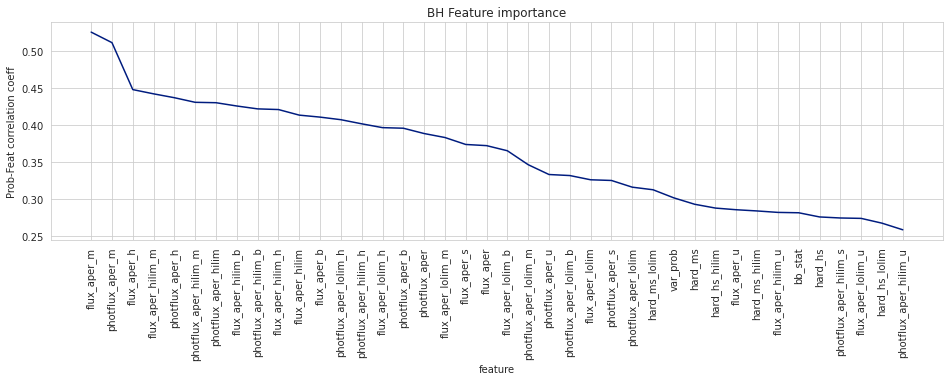

In [47]:
th_bh_corr = th_bh.corr().dropna(how='all' , axis=0).dropna(how='all' , axis=1).abs()
th_bh_corr = th_bh_corr[['pred_prob']][2:].sort_values(by='pred_prob' , ascending=False)
#display(th_bh_corr)
feat_num = 40
feat_names = th_bh_corr.index.to_list()[:feat_num]
feat_values = th_bh_corr['pred_prob'][:feat_num]
plt.figure(figsize=(16 , 4))
plt.plot(feat_names , feat_values)
plt.xticks(rotation=90)
plt.ylabel('Prob-Feat correlation coeff')
plt.xlabel('feature')
plt.savefig('result/bh_feat_imp.jpg')
plt.title('BH Feature importance')
#plt.subplots_adjust(bottom=0.8)

plt.show()

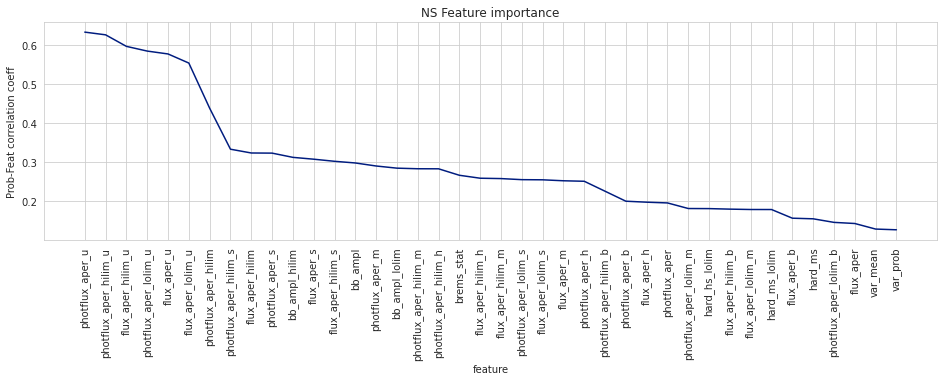

In [48]:
th_ns_corr = th_ns.corr().dropna(how='all' , axis=0).dropna(how='all' , axis=1).abs()
th_ns_corr = th_ns_corr[['pred_prob']][2:].sort_values(by='pred_prob' , ascending=False)
feat_num = 40
feat_names = th_ns_corr.index.to_list()[:feat_num]
feat_values = th_ns_corr['pred_prob'][:feat_num]
plt.figure(figsize=(16 , 4))
plt.plot(feat_names , feat_values)
plt.xticks(rotation=90)
plt.ylabel('Prob-Feat correlation coeff')
plt.xlabel('feature')
plt.savefig('result/ns_feat_imp.jpg')
plt.title('NS Feature importance')
plt.show()

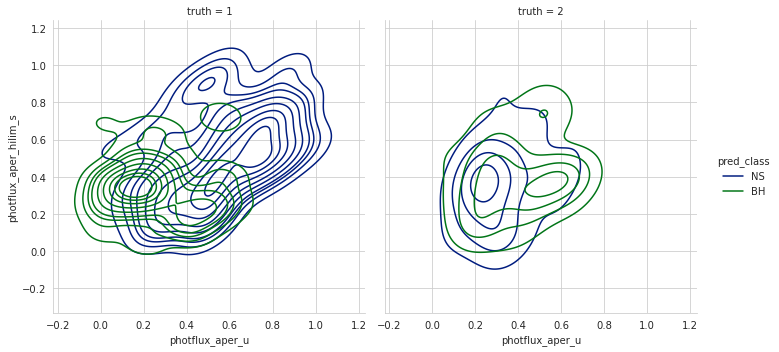

In [55]:

ax = sns.displot(
    data = data , kind='kde',
    x = 'photflux_aper_u' , y = 'photflux_aper_hilim_s' , 
    hue = 'pred_class' , 
    col = 'truth' , 
)

plt.show()